In [113]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn import datasets, linear_model
from sklearn import metrics
import os
%matplotlib inline

path = os.getcwd()
path = path + '\Dataset\Coastal Data System - Waves.csv'

#Read csv
waves = pd.read_csv(path)

waves.columns = ["time", "Hs", "Hmax","Tz","Tp","direction", "temp"]
waves["time"] = pd.to_datetime(waves["time"])
waves["year"] = waves["time"].astype(str).str[0:4]
waves["year"] = waves["year"].astype(int)

waves["time1"] = waves["time"].astype(str).str[11:16]
waves["month"] = waves["time"].astype(str).str[5:7]

#Floor(Round to .0) peak direction
waves["dir"] = 10* (waves["direction"] // 10)

#Floor(Round to .0) temperature
waves["temp1"] = (waves["temp"] // 1)

waves.info()
waves.head()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43454 entries, 0 to 43453
Data columns (total 12 columns):
time         43454 non-null datetime64[ns]
Hs           43454 non-null float64
Hmax         43454 non-null float64
Tz           43454 non-null float64
Tp           43454 non-null float64
direction    43454 non-null int64
temp         43454 non-null float64
year         43454 non-null int32
time1        43454 non-null object
month        43454 non-null object
dir          43454 non-null int64
temp1        43454 non-null float64
dtypes: datetime64[ns](1), float64(6), int32(1), int64(2), object(2)
memory usage: 3.8+ MB


,time,Hs,Hmax,Tz,Tp,direction,temp,year,time1,month,dir,temp1
0,2018-07-19 20:00:00,0.676,1.120,3.693,3.597,5,20.75,2018,20:00,07,0,20.0
1,2018-07-19 19:30:00,0.672,1.080,3.712,3.598,8,20.75,2018,19:30,07,0,20.0
2,2018-10-09 21:30:00,1.154,2.394,4.407,5.060,9,21.90,2018,21:30,10,0,21.0
3,2017-07-31 19:30:00,0.915,1.540,3.780,4.185,11,21.40,2017,19:30,07,10,21.0
4,2017-09-16 18:00:00,1.058,1.740,3.971,4.605,14,21.30,2017,18:00,09,10,21.0


In [101]:
X = waves[['Hs','Hmax','Tz','Tp','dir']]
y = waves[['temp1']]

X.head()




,Hs,Hmax,Tz,Tp,dir
0,0.870,0.51,4.256,5.835,40.0
1,0.902,0.52,4.432,5.963,50.0
2,0.960,0.53,4.505,5.973,50.0
3,0.953,0.53,4.673,5.492,50.0
4,0.928,0.53,4.485,5.639,50.0


In [123]:
X = waves[['Hmax', 'Tz', 'Tp','temp1','dir']]
y = waves[['Hs']]

#Hs depending on X(Attributes) so accuracy is 0.94
#You can change X and y to train and test model and the accuracy of results will change
#Depending on relation of attributes with each other

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

print ('Score:'), model.score(X_test, y_test)


(39108, 5) (39108, 1)
(4346, 5) (4346, 1)
Score:


(None, 0.9483612190947119)

Text(0, 0.5, 'Predictions')

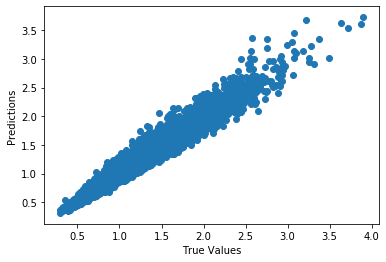

In [124]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')